In [89]:
import pandas as pd 
import json 
import yaml
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
with open('yaml_example.yaml') as file:
    data = file.read()
    

In [4]:
data

'Person:\n    - name: Alex\n      surname: Brown\n      role: "Student"\n      age: 20\n    - name: Chris\n      surname: Davis\n      role: Instructor\n      age: 31\n    - name: Emma\n      surname: Green\n      role: Student\n      age: 22\n    - name: John\n      surname: King\n      role: Admin\n      age: 27\n    - name: Lucy\n      surname: Miller\n      role: Admin\n      age: 24\n    - name: Nick\n      surname: Oliver\n      role: Professor\n      age: 45\n    - name: Paul\n      surname: Quinn\n      role: Assistant\n      age: 19'

In [5]:
data_v2 = data.split(':\n    ')


In [6]:
data_v2

['Person',
 '- name: Alex\n      surname: Brown\n      role: "Student"\n      age: 20\n    - name: Chris\n      surname: Davis\n      role: Instructor\n      age: 31\n    - name: Emma\n      surname: Green\n      role: Student\n      age: 22\n    - name: John\n      surname: King\n      role: Admin\n      age: 27\n    - name: Lucy\n      surname: Miller\n      role: Admin\n      age: 24\n    - name: Nick\n      surname: Oliver\n      role: Professor\n      age: 45\n    - name: Paul\n      surname: Quinn\n      role: Assistant\n      age: 19']

In [7]:
data_v2[1] = data_v2[1].split('-')

In [8]:
data_v2

['Person',
 ['',
  ' name: Alex\n      surname: Brown\n      role: "Student"\n      age: 20\n    ',
  ' name: Chris\n      surname: Davis\n      role: Instructor\n      age: 31\n    ',
  ' name: Emma\n      surname: Green\n      role: Student\n      age: 22\n    ',
  ' name: John\n      surname: King\n      role: Admin\n      age: 27\n    ',
  ' name: Lucy\n      surname: Miller\n      role: Admin\n      age: 24\n    ',
  ' name: Nick\n      surname: Oliver\n      role: Professor\n      age: 45\n    ',
  ' name: Paul\n      surname: Quinn\n      role: Assistant\n      age: 19']]

In [9]:
people = []
for person in data_v2[1]:
    people.append(person.strip().split('\n      '))


In [10]:
people

[[''],
 ['name: Alex', 'surname: Brown', 'role: "Student"', 'age: 20'],
 ['name: Chris', 'surname: Davis', 'role: Instructor', 'age: 31'],
 ['name: Emma', 'surname: Green', 'role: Student', 'age: 22'],
 ['name: John', 'surname: King', 'role: Admin', 'age: 27'],
 ['name: Lucy', 'surname: Miller', 'role: Admin', 'age: 24'],
 ['name: Nick', 'surname: Oliver', 'role: Professor', 'age: 45'],
 ['name: Paul', 'surname: Quinn', 'role: Assistant', 'age: 19']]

In [11]:
people_list = [] 
for person in people:
    if person != ['']:
        people_dict = {}
        for item in person:
            temp_variable = item.split(': ')
            try:               
                people_dict[temp_variable[0].strip()] = int(temp_variable[1].replace('"', '').strip())
            except:               
                people_dict[temp_variable[0].strip()] = temp_variable[1].replace('"', '').strip()
        people_list.append(people_dict)






In [12]:
people_list

[{'name': 'Alex', 'surname': 'Brown', 'role': 'Student', 'age': 20},
 {'name': 'Chris', 'surname': 'Davis', 'role': 'Instructor', 'age': 31},
 {'name': 'Emma', 'surname': 'Green', 'role': 'Student', 'age': 22},
 {'name': 'John', 'surname': 'King', 'role': 'Admin', 'age': 27},
 {'name': 'Lucy', 'surname': 'Miller', 'role': 'Admin', 'age': 24},
 {'name': 'Nick', 'surname': 'Oliver', 'role': 'Professor', 'age': 45},
 {'name': 'Paul', 'surname': 'Quinn', 'role': 'Assistant', 'age': 19}]

In [13]:
person = pd.DataFrame(people_list)

In [14]:
person

,name,surname,role,age
0,Alex,Brown,Student,20
1,Chris,Davis,Instructor,31
2,Emma,Green,Student,22
3,John,King,Admin,27
4,Lucy,Miller,Admin,24
5,Nick,Oliver,Professor,45
6,Paul,Quinn,Assistant,19


In [15]:
with open('yaml_example.yaml') as file:
    yaml_data = yaml.safe_load(file)
    


In [16]:
yaml_data

{'Person': [{'name': 'Alex', 'surname': 'Brown', 'role': 'Student', 'age': 20},
  {'name': 'Chris', 'surname': 'Davis', 'role': 'Instructor', 'age': 31},
  {'name': 'Emma', 'surname': 'Green', 'role': 'Student', 'age': 22},
  {'name': 'John', 'surname': 'King', 'role': 'Admin', 'age': 27},
  {'name': 'Lucy', 'surname': 'Miller', 'role': 'Admin', 'age': 24},
  {'name': 'Nick', 'surname': 'Oliver', 'role': 'Professor', 'age': 45},
  {'name': 'Paul', 'surname': 'Quinn', 'role': 'Assistant', 'age': 19}]}

In [17]:
json_data = json.loads(json.dumps(yaml_data))


In [18]:
json_data

{'Person': [{'name': 'Alex', 'surname': 'Brown', 'role': 'Student', 'age': 20},
  {'name': 'Chris', 'surname': 'Davis', 'role': 'Instructor', 'age': 31},
  {'name': 'Emma', 'surname': 'Green', 'role': 'Student', 'age': 22},
  {'name': 'John', 'surname': 'King', 'role': 'Admin', 'age': 27},
  {'name': 'Lucy', 'surname': 'Miller', 'role': 'Admin', 'age': 24},
  {'name': 'Nick', 'surname': 'Oliver', 'role': 'Professor', 'age': 45},
  {'name': 'Paul', 'surname': 'Quinn', 'role': 'Assistant', 'age': 19}]}

In [19]:
new_data = pd.json_normalize(json_data['Person'])

In [20]:
new_data

,name,surname,role,age
0,Alex,Brown,Student,20
1,Chris,Davis,Instructor,31
2,Emma,Green,Student,22
3,John,King,Admin,27
4,Lucy,Miller,Admin,24
5,Nick,Oliver,Professor,45
6,Paul,Quinn,Assistant,19


In [21]:
salary_data = pd.read_csv('Salaries.csv')


In [22]:
salary_data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [23]:
salary_data.JobTitle.unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC',
       'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',
       'ASSISTANT DEPUTY CHIEF II', 'BATTALION CHIEF, (FIRE DEPARTMENT)',
       'DEPUTY DIRECTOR OF INVESTMENTS',
       'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'EXECUTIVE CONTRACT EMPLOYEE', 'DEPARTMENT HEAD V',
       'COMMANDER III, (POLICE DEPARTMENT)',
       'CAPTAIN, EMERGENCYCY MEDICAL SERVICES',
       'ASSISTANT MEDICAL EXAMINER', 'CAPTAIN, FIRE SUPPRESSION',
       'CHIEF OF POLICE', 'DEPUTY CHIEF III (POLICE DEPARTMENT)',
       'INSPECTOR III, (POLICE DEPARTMENT)',
       'ELECTRONIC MAINTENANCE TECHNICIAN',
       'ADMINISTRATOR, SFGH MEDICAL CENTER',
       'LIEUTENANT III (POLICE DEPARTMENT)', 'FIREFIGHTER',
       'NURSING SUPERVISOR PSYCHIATRIC', 'MAYOR',
       'LIEUTENANT, FIRE DEPARTMENT', 'INCIDENT 

In [24]:
def filter_fire(x):
    return "FIRE DEPARTMENT" in x

def filter_police(x):
    return "POLICE DEPARTMENT" in x 




In [25]:
salary_data.BasePay > 10000 


0      True
1      True
2      True
3      True
4      True
       ... 
671    True
672    True
673    True
674    True
675    True
Name: BasePay, Length: 676, dtype: bool

In [26]:
salary_data.JobTitle.apply(filter_fire)

0      False
1      False
2      False
3      False
4       True
       ...  
671    False
672    False
673    False
674    False
675    False
Name: JobTitle, Length: 676, dtype: bool

In [27]:
a = salary_data[salary_data.JobTitle.apply(filter_fire)].shape[0]

In [28]:
b = salary_data[salary_data.JobTitle.apply(filter_police)].shape[0]

In [29]:
print(b/a)

1.3181818181818181


In [30]:
mean_police_salary = salary_data[salary_data.JobTitle.apply(filter_police)].BasePay.mean()
print(mean_police_salary)

151947.28689655173


In [31]:
mean_fire_salary = salary_data[salary_data.JobTitle.apply(filter_fire)].BasePay.mean()
print(mean_fire_salary)

144449.87079545454


In [32]:
json_data = [{"Name": "John", "Age": 30, "Address": {"Street": "Main Street", "City": "New York", "State": "NY", "Zip": "10001"}},
{"Name": "Peter", "Age": 35, "Address": {"Street": "2nd Street", "City": "Los Angeles", "State": "CA", "Zip": "90001"}},
{"Name": "Amy", "Age": 20, "Address": {"Street": "1st Street", "City": "Chicago", "State": "IL", "Zip": "60601"}}]





In [33]:
json_file = pd.json_normalize(json_data)

In [34]:
json_file

,Name,Age,Address.Street,Address.City,Address.State,Address.Zip
0,John,30,Main Street,New York,NY,10001
1,Peter,35,2nd Street,Los Angeles,CA,90001
2,Amy,20,1st Street,Chicago,IL,60601


In [35]:
with open("json_sample.json", "w") as file:
    json.dump(json_data, file)


In [36]:
unique_jobs = salary_data.JobTitle.nunique()
print(unique_jobs)

93


In [37]:
def get_first_name(x, name = "john"):
    first_name = x.split()[0]
    return first_name.lower() == name.lower()


    


In [38]:
first_name_john = salary_data[salary_data.EmployeeName.apply(get_first_name, name = 'john')]

In [39]:
first_name_john

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
13,AN,JOHN MARTIN,DEPARTMENT HEAD V,271329.03,0.00,21342.59,NaN,292671.62,292671.62,2011,NaN,San Francisco,NaN
26,BA,JOHN HANLEY,"CAPTAIN, FIRE SUPPRESSION",92080.80,40008.00,133695.76,NaN,265784.56,265784.56,2011,NaN,San Francisco,NaN
33,BH,JOHN TURSI,"INSPECTOR III, (POLICE DEPARTMENT)",104861.39,50227.61,103499.39,NaN,258588.39,258588.39,2011,NaN,San Francisco,NaN
93,DP,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT),215914.03,0.00,12293.83,NaN,228207.86,228207.86,2011,NaN,San Francisco,NaN
112,EI,JOHN HALEY JR,DEPUTY DIRECTOR II - MUNICIPAL TRANSPORTATION AG,220115.22,0.00,237.00,NaN,220352.22,220352.22,2011,NaN,San Francisco,NaN
127,EX,JOHN HICKEY,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.63,22432.91,25855.73,NaN,216981.27,216981.27,2011,NaN,San Francisco,NaN
132,FC,JOHN RAHAIM,DEPARTMENT HEAD IV,215799.48,0.00,0.00,NaN,215799.48,215799.48,2011,NaN,San Francisco,NaN
153,FX,JOHN CAVANAUGH,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.88,54054.41,18236.44,NaN,212837.73,212837.73,2011,NaN,San Francisco,NaN
163,GH,JOHN BRAGAGNOLO,SERGEANT III (POLICE DEPARTMENT),130457.96,6284.61,73334.31,NaN,210076.88,210076.88,2011,NaN,San Francisco,NaN
185,HD,JOHN BROWN,MANAGER VIII,207798.79,0.00,0.00,NaN,207798.79,207798.79,2011,NaN,San Francisco,NaN


In [40]:
def check_first_name(x):
    first_name = x.split()[0]
    last_name = x.split()[1]
    if len(first_name) > 6: 
        return last_name

    



In [41]:
last_names = salary_data.EmployeeName.apply(check_first_name).dropna()

In [42]:
last_names

0                FORD
3               CHONG
4             GARDNER
8              MORRIS
11            JACKSON
            ...      
661            GAUGER
662               LEE
667               LIU
670          SALVESON
674    AGUILAR-TARCHI
Name: EmployeeName, Length: 215, dtype: object

In [43]:
salary_data.iloc[last_names.index, [1,4]]

,EmployeeName,OvertimePay
0,NATHANIEL FORD,0.00
3,CHRISTOPHER CHONG,56120.71
4,PATRICK GARDNER,9737.00
8,MICHAEL MORRIS,86362.68
11,PATRICIA JACKSON,87082.62
...,...,...
661,CHRISTOPHER GAUGER,0.00
662,PATRICIA LEE,0.00
667,REBECCA LIU,0.00
670,ELIZABETH SALVESON,0.00


In [44]:
salary_data['last_updated'] = datetime.datetime.now().isoformat()

In [45]:
salary_data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,last_updated
0,AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637
1,AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637
2,AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637
3,AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637
4,AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637


In [46]:
salary_data['time_ratio'] = salary_data['OvertimePay']/salary_data['BasePay']

In [47]:
salary_data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,last_updated,time_ratio
0,AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.000000
1,AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,1.571701
2,AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.498677
3,AD,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.720272
4,AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.072447


In [48]:
new_df = salary_data[salary_data['BasePay']>100000]

In [49]:
new_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,last_updated,time_ratio
0,AA,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.000000
1,AB,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,1.571701
2,AC,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.498677
4,AE,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.072447
5,AF,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.072520


In [50]:
new_df = pd.concat([new_df,new_df.mode().iloc[0:1,:]], ignore_index= True)

In [51]:
new_df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,last_updated,time_ratio
613,ZW,LOUISE SIMPSON,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.18,0.00,3537.80,NaN,180393.98,180393.98,2011.0,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.000000
614,ZX,BLAKE LOEBS,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.19,0.00,3537.75,NaN,180393.94,180393.94,2011.0,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.000000
615,ZY,ELIZABETH AGUILAR-TARCHI,"HEAD ATTORNEY, CIVIL AND CRIMINAL",176856.17,0.00,3537.11,NaN,180393.28,180393.28,2011.0,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.000000
616,ZZ,JULIAN NG,SERGEANT III (POLICE DEPARTMENT),130457.76,43793.11,6061.80,NaN,180312.67,180312.67,2011.0,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.335688
617,AA,JOHN MURPHY,FIREFIGHTER,105934.64,0.00,0.00,NaN,185695.36,185695.36,2011.0,NaN,San Francisco,NaN,2023-05-26T15:10:56.545637,0.000000


In [52]:
car_insurance = pd.read_csv('Car_Insurance.csv')

In [53]:
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [54]:
car_insurance.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [55]:
car_insurance.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [56]:
car_insurance.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [57]:
car_insurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [58]:
car_insurance.dropna(inplace= True)

In [59]:
car_insurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
15,16,61,management,single,tertiary,0,2,0,0,cellular,12,aug,1,114,3,failure,16:18:48,16:20:59,1
16,17,34,admin.,single,secondary,0,69,1,0,telephone,6,may,3,362,4,other,11:48:45,11:50:17,0
17,18,46,management,married,tertiary,0,7331,0,0,cellular,11,sep,4,95,2,other,11:23:26,11:34:24,1


In [60]:
car_insurance.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2004.713341,41.261301,0.004410,1741.250276,0.509372,0.098126,14.407938,1.929438,204.815877,2.987872,0.579934
std,1121.137774,12.269017,0.066299,3273.816214,0.500188,0.297649,8.263130,1.394361,118.418023,3.375811,0.493842
min,3.000000,18.000000,0.000000,-982.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1089.000000,33.000000,0.000000,228.000000,0.000000,0.000000,7.000000,1.000000,102.000000,1.000000,0.000000
50%,2019.000000,38.000000,0.000000,724.000000,1.000000,0.000000,14.000000,1.000000,182.000000,2.000000,1.000000
75%,2938.500000,48.000000,0.000000,1947.000000,1.000000,0.000000,20.000000,2.000000,288.000000,4.000000,1.000000
max,3999.000000,82.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,12.000000,854.000000,58.000000,1.000000


In [61]:
car_insurance['Job'].value_counts()

Job
management       231
technician       152
blue-collar      131
admin.           114
services          69
retired           64
unemployed        48
student           40
self-employed     27
entrepreneur      16
housemaid         15
Name: count, dtype: int64

In [62]:
start_column = pd.to_datetime(car_insurance['CallStart'])

/var/folders/gr/1chcvpfn759d9tws5l0kwwkc0000gn/T/ipykernel_4030/2467949461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  start_column = pd.to_datetime(car_insurance['CallStart'])


In [63]:
start_column

2      2023-05-26 16:30:24
5      2023-05-26 14:58:08
15     2023-05-26 16:18:48
16     2023-05-26 11:48:45
17     2023-05-26 11:23:26
               ...        
3987   2023-05-26 09:55:44
3990   2023-05-26 13:30:49
3992   2023-05-26 10:51:19
3995   2023-05-26 17:46:28
3998   2023-05-26 11:27:35
Name: CallStart, Length: 907, dtype: datetime64[ns]

In [64]:
end_column = pd.to_datetime(car_insurance['CallEnd'])

/var/folders/gr/1chcvpfn759d9tws5l0kwwkc0000gn/T/ipykernel_4030/4106981867.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  end_column = pd.to_datetime(car_insurance['CallEnd'])


In [65]:
end_column

2      2023-05-26 16:36:04
5      2023-05-26 15:11:24
15     2023-05-26 16:20:59
16     2023-05-26 11:50:17
17     2023-05-26 11:34:24
               ...        
3987   2023-05-26 09:59:44
3990   2023-05-26 13:33:16
3992   2023-05-26 10:55:10
3995   2023-05-26 17:50:57
3998   2023-05-26 11:29:14
Name: CallEnd, Length: 907, dtype: datetime64[ns]

In [66]:
call_time = end_column - start_column

In [67]:
seconds = call_time.apply(lambda x: x.seconds)

In [68]:
car_insurance["call_time"] = seconds

In [69]:
car_insurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,call_time
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,340
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1,796
15,16,61,management,single,tertiary,0,2,0,0,cellular,12,aug,1,114,3,failure,16:18:48,16:20:59,1,131
16,17,34,admin.,single,secondary,0,69,1,0,telephone,6,may,3,362,4,other,11:48:45,11:50:17,0,92
17,18,46,management,married,tertiary,0,7331,0,0,cellular,11,sep,4,95,2,other,11:23:26,11:34:24,1,658


In [70]:
car_insurance["call_time"].mean()


335.74862183020946

<Axes: xlabel='call_time', ylabel='Count'>

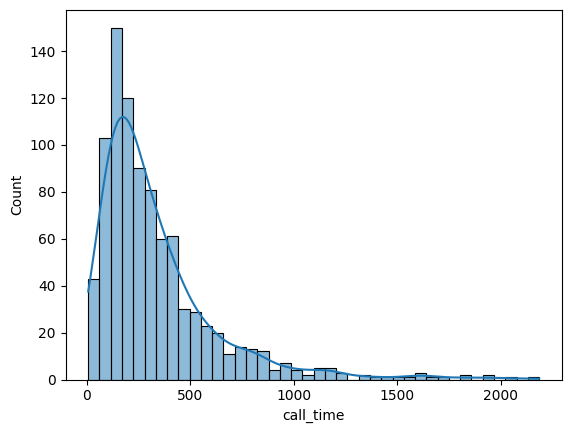

In [81]:
sns.histplot(car_insurance["call_time"],kde= True)

<Axes: xlabel='call_time'>

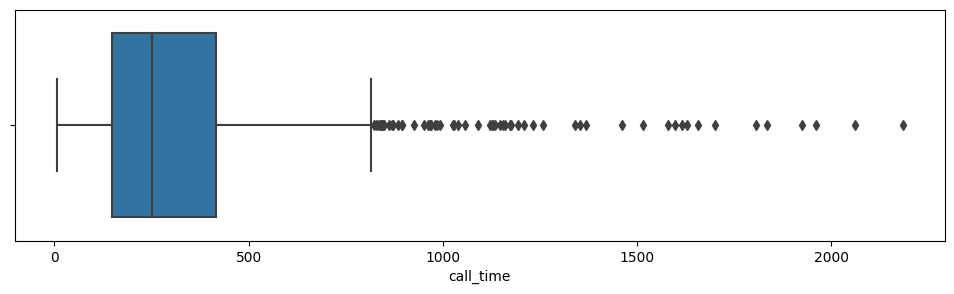

In [92]:
plt.figure(figsize= (12,3))

sns.boxplot(data = car_insurance, x = "call_time", )

In [98]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun']

communication_df = car_insurance[car_insurance['LastContactMonth'].apply(lambda x : x in months )]

In [100]:
communication_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,call_time
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,340
5,6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1,796
16,17,34,admin.,single,secondary,0,69,1,0,telephone,6,may,3,362,4,other,11:48:45,11:50:17,0,92
18,19,49,blue-collar,married,secondary,0,2039,1,0,cellular,6,may,1,169,2,failure,12:42:54,12:50:25,1,451
24,25,60,technician,married,secondary,0,824,1,0,cellular,9,feb,1,558,7,other,16:30:52,16:32:59,1,127


In [102]:
communication_df['Communication'].mode().iloc[0]

'cellular'